In [53]:
import dicom
import os
import numpy
from matplotlib import pyplot, cm
from matplotlib import pylab
from sklearn import datasets, neighbors, linear_model
from skimage.feature import greycomatrix, greycoprops

In [10]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [7]:
pathTrainNeg = "./fibrosis_patches_8/train/path"
pathTrainPos = "./fibrosis_patches_8/train/norm"
pathTestPos = "./fibrosis_patches_8/test/path"
pathTestNeg = "./fibrosis_patches_8/test/norm"
lstFilesTrainNeg = []
lstFilesTrainPos = []
lstFilesTestNeg = []
lstFilesTestPos = []
for dirName, subdirList, fileList in os.walk(pathTrainNeg):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTrainNeg.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTrainPos):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTrainPos.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTestPos):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTestPos.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTestNeg):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTestNeg.append(os.path.join(dirName,filename))

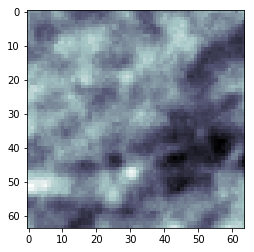

In [8]:
pylab.imshow(numpy.reshape(X_train[6], (-1, 64)), cmap=pylab.cm.bone_r)
pylab.show()

In [91]:
pos_train=[]
neg_train=[]
X_train=[]
y_train=[]
X_test=[]
y_test=[]
learn_num = 100

for idx,img in enumerate(lstFilesTrainNeg):
    #temp = numpy.ravel(dicom.read_file(img).pixel_array)
    temp = dicom.read_file(img).pixel_array
    X_train.append(temp)
    neg_train.append(temp)
    y_train.append(0)
    if idx>learn_num:
        break

for idx,img in enumerate(lstFilesTrainPos):
    #temp = numpy.ravel(dicom.read_file(img).pixel_array)
    temp = dicom.read_file(img).pixel_array
    X_train.append(temp)
    pos_train.append(temp)
    y_train.append(1)
    if idx>learn_num:
        break

(X_train, y_train) = unison_shuffled_copies(numpy.asarray(X_train), numpy.asarray(y_train))
for idx,img in enumerate(lstFilesTestNeg):
    #temp = numpy.ravel(dicom.read_file(img).pixel_array)
    temp = dicom.read_file(img).pixel_array
    X_test.append(temp)
    y_test.append(0)
    if idx>learn_num:
        break
for idx,img in enumerate(lstFilesTestPos):
    #temp = numpy.ravel(dicom.read_file(img).pixel_array)
    temp = dicom.read_file(img).pixel_array
    X_test.append(temp)
    y_test.append(1)
    if idx>learn_num:
        break


In [49]:
#preprocc
X_train_mean=[]
X_test_mean=[]
GLCM_train=[]
GLCM_test=[]
for item in X_train:
    list = [el for el in item if el<4000]
    X_train_mean.append([numpy.mean(item),len(list)])
for item in X_test:
    list = [el for el in item if el<4000]
    X_test_mean.append([numpy.mean(item),len(list)])
X_train_mean = numpy.asarray(X_train_mean)
X_test_mean = numpy.asarray(X_test_mean)
print(X_train_mean[1])
print(X_test_mean[1])
""""
for item in X_train:
    for val in item:
        if val > 4000:
            val = val / 40
for item in X_test:
    for val in item:
        if val > 4000:
            val = val / 40

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-49-30f49ed6de5e>, line 22)

In [92]:
GLCM_train =[]
GLCM_test =[]
print(X_train[0])
for img in X_train:
    glcm = greycomatrix(img, [5], [0], 256, symmetric=True, normed=True)
    GLCM_train.append([greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]])

[[4300 4305 4333 ..., 4439 4463 4444]
 [4398 4460 4573 ..., 4375 4381 4441]
 [4542 4675 4724 ..., 4292 4359 4504]
 ..., 
 [4976 4971 4964 ..., 4539 4417 4400]
 [4818 4917 4952 ..., 4627 4577 4467]
 [4839 4926 4911 ..., 4508 4386 4309]]


ValueError: The maximum grayscale value in the image should be smaller than the number of levels.

In [ ]:
%matplotlib inline
flat_pos_list = [item for sublist in pos_train for item in sublist]
flat_neg_list = [item for sublist in neg_train for item in sublist]
bins = numpy.linspace(2000, 8000, 100)
pyplot.hist(flat_pos_list,bins,alpha=0.5)
pyplot.hist(flat_neg_list,bins,alpha=0.5)

(array([   9.,   17.,   17.,   18.,   15.,   19.,   18.,   19.,    8.,
           6.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    4.,   10.,
          17.,   17.,   18.,   21.,   33.,   39.,   40.,   39.,   42.,
          44.,   46.,   49.,   42.,   57.,   50.,   54.,   64.,   59.,
          71.,   87.,  127.,  112.,  120.,  147.,  181.,  201.,  203.,
         157.,  128.,  124.,  160.,  154.,  171.,  197.,  184.,  170.,
         183.,  208.,  215.,  214.,  212.,  237.,  216.,  209.,  202.,
         202.,  191.,  176.,  182.,  184.,  176.,  177.,  163.,  179.,
         137.,  142.,  178.,  162.,  153.,  142.,  168.,  139.,  117.,
         118.,   93.,   98.,   97.,   90.,   92.,   78.,   76.,   92.]),
 array([ 2000.        ,  2050.50505051,  2101.01010101,  2151.51515152,
         2202.02020202,  2252.52525253,  2303.03030303,  2353.53535354,
         2404.04040404,  2454.54545455,  2505.05050505,  2555.55555556,
 

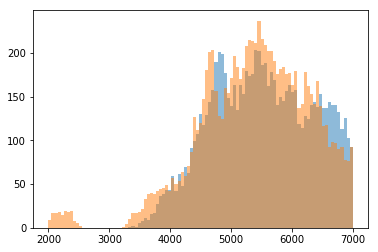

In [51]:
%matplotlib inline
avg_pos_val=[]
avg_neg_val=[]
for item in pos_train:
    avg_pos_val.append(numpy.mean(item))
for item in neg_train:
    avg_neg_val.append(numpy.mean(item))
bins = numpy.linspace(2000, 7000, 100)
pyplot.hist(avg_pos_val,bins,alpha=0.5)
pyplot.hist(avg_neg_val,bins,alpha=0.5)

In [36]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train_mean, y_train).score(X_test_mean, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train_mean, y_train).score(X_test_mean, y_test))

KNN score: 0.479541
LogisticRegression score: 0.477545
